In [1]:
library("Mapper")
library("igraph")
library("RcppCNPy")
library("pals")
library("stringr")
library("grid")
library("matlab")
require("plotrix") 
source("functions-R.R") #Functions
library("lattice")


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘matlab’


The following object is masked from ‘package:stats’:

    reshape


The following objects are masked from ‘package:utils’:

    find, fix


The following object is masked from ‘package:base’:

    sum


Loading required package: plotrix



## Colors

In [2]:
show_palette <- function(colors) {
  par(pin=c(6,1),mai=c(.5,.5,.5,.5))
  image(1:n, 1, as.matrix(1:n), col = colors, 
    xlab = "", ylab = "", xaxt = "n", 
    yaxt = "n", bty = "n")
}

In [3]:
n<-176
#show_palette(jet.colors(n))
colors1=list(jet.colors(n))

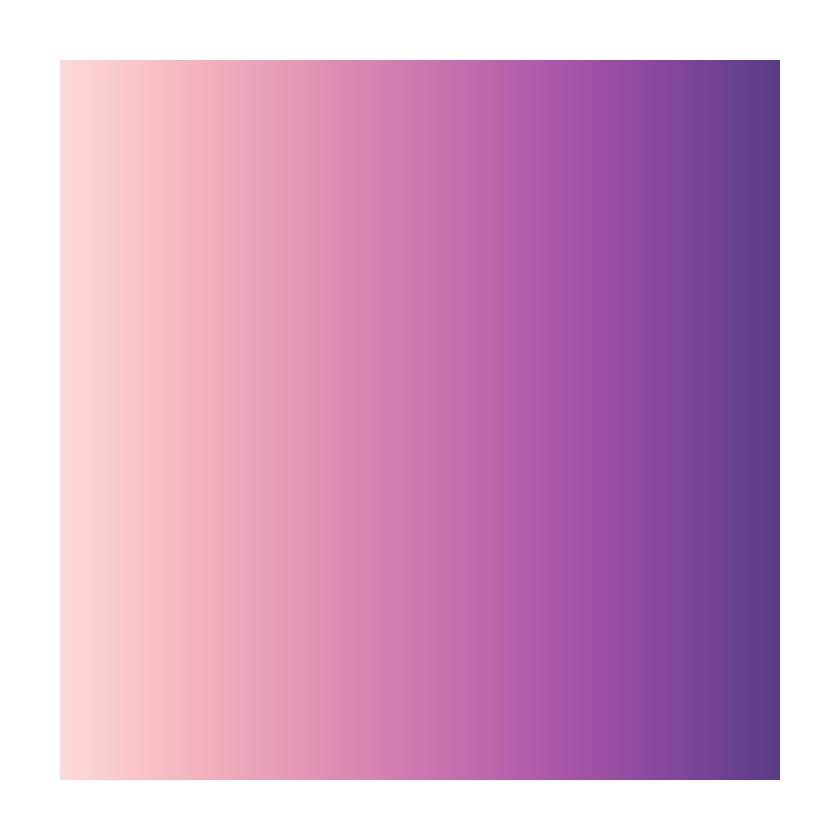

In [4]:
u <- 25
#show_palette(colors3)
show_palette(hcl.colors(n, palette = "PurpOr")[rev(1:n)])
colors2=list(hcl.colors(n, palette = "PurpOr")[rev(1:n)])
# show_palette(hcl.colors(n+u, palette = "purples")[rev(1:n)])
# colors2=list(hcl.colors(n+u, palette = "purples")[rev(1:n)])

In [5]:
# n <- 251
# u <- 76
# show_palette(rainbow(n)[rev(1:(n+1-u))])
# length(1:(n+1-u))
# colors1=list(rainbow(n)[rev(1:(n+1-u))])

In [6]:
colors=list(colors2,colors1)

In [7]:
#Suspense data
suspense=npyLoad("../Data/avg_suspense.npy")
length(suspense)

[1] 193

## Filters

In [8]:
filters=Sys.glob("../Data/filts/*.npy")
filters

[1] "../Data/filts/all_l1_iso_rand.npy"    
[2] "../Data/filts/all_l1-nothres_cmds.npy"
[3] "../Data/filts/all_l1-nothres_iso.npy" 
[4] "../Data/filts/all_l1-nothres_se.npy"  
[5] "../Data/filts/all_l1-thres_cmds.npy"  
[6] "../Data/filts/all_l1-thres_iso.npy"   
[7] "../Data/filts/all_l1-thres_se.npy"

In [15]:
my_names(filters[[6]])

$part
[1] "all"

$metric
[1] "l1-thres"

$filter
[1] "iso"

$dist_file
[1] "../Data/dist/all_l1-thres.npy"

$file
[1] "../Data/mapper/all_l1-thres_iso.rds"

$pdf
[1] "../Imagenes/mapper_graphs/mapper_all_l1-thres_iso.pdf"

$title
[1] "Mapper for part =  all , metric= l1-thres , filter = iso"

[1] 176   2

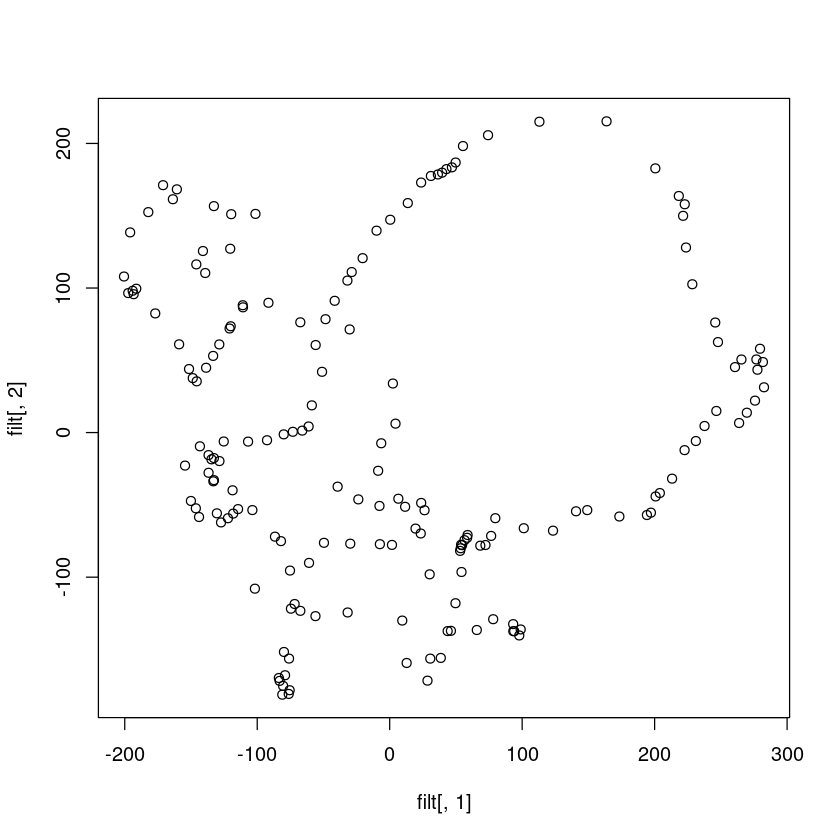

In [16]:
options(repr.plot.width=7, repr.plot.height=7)
filt=npyLoad(filters[[6]])
dim(filt)
plot(filt[,1],filt[,2])

In [17]:
list_of_filters=filters[c(6)]
list_of_filters

[1] "../Data/filts/all_l1-thres_iso.npy"

In [18]:
#Generating all mapper graphs 
set.seed(1)
gr=list()
map=list()
for (file in list_of_filters){
    # -------- Names ----------- 
    mynames=my_names(file) #Has 6 elements: part, metric, filter,
                           #dist_file, pdf and title
    #mynames$dist_file = "../Data/dist/all_l1_geo.npy"
    # ---------- Data -------------
    filter=npyLoad(file)
    #filter <- as.matrix(read.table("../Data/mapper_iso.txt", header=F))
    time_points=nrow(filter)
    diss=npyLoad(mynames[["dist_file"]]) #Distance matrix

    f=make_image(suspense[11:186])
    fmax=round(max(suspense),2)
    fmin=round(min(suspense),2)
    # -------- generate Mapper -----------

    int=5 #Number of intervals to be considered
    ov=5 #Number of overlaps to be considered

    print(mynames$title)
    gr[[file]]=list()
    map[[file]]=list()
    i=0
    for (overlap in 5*(1:ov)+15){
        for (intervals in (1:int)+3){
            i=i+1
            cat(i,"\t")
            #------------------ Mapper -----------------
            m = MapperRef$new(dist_x=diss)$
                use_filter(filter=filter)$
                use_cover(number_intervals = intervals,percent_overlap = overlap)$
                use_clustering_algorithm(cl = "single" , 
                                 cutoff_method = "continuous" ,adjust=1,min_dist=65)$
                construct_k_skeleton(k = 1L)
            #----------------- Graphs -----------------
    
            my_layout=layout_with_kk(m$as_igraph())
            #Time
            my_make_pie1=make_pie_fun(id,m$vertices,time_points)
            #Suspense
            my_make_pie2=make_pie_fun(f,m$vertices,time_points)
            
            map[[file]][[i]]=list('graph'=m$as_igraph(),'vertices'=m$vertices,
                                  'edges'=m$simplicial_complex$as_adjacency_list()) 
            attr(map[[file]][[i]], ".summary") = format(m$cover)
            class(map[[file]][[i]]) <- "Mapper"
                                  
            gr[[file]][[i]]=my_plot_params(m,my_layout,my_make_pie2,colors1,
                                 c(intervals,overlap),margin=c(.1,.8,.2,.8),pin=c(1.3,1.3)) #level of suspense
            gr[[file]][[i+int*ov]]=my_plot_params(m,my_layout,my_make_pie1,colors2,
                                  ,margin=c(.1,.8,2,.8),pin=c(1.3,1.3)) #time
        }
    } 
    cat("\n")
}

[1] "Mapper for part =  all , metric= l1-thres , filter = iso"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	


In [45]:
##### Plot just time 

# for (i in (total/2 + 1):total){
#     gr[[file]][[i]]$pin = c(1,1)
#     gr[[file]][[i]]$margin = c(.1,.1,.1,.1)
# }


In [19]:
##### Plot just time 

#options(repr.plot.width=2*int+1, repr.plot.height=1.51*2*ov+3)
for (file in list_of_filters){
    mynames=my_names(file)
    #pdf('../Imagenes/mapper_graphs/mapper_all_l1-nothres_iso_time.pdf',width=1.1*int,height=1.1*ov+.5) #Without title
    pdf(mynames$pdf,width=2*int+1,height=1.51*ov+3)  #With title (width and height)
    total=length(gr[[file]])
    layout=make_layout(total=total/2 - 5,cols=int,intercalado=FALSE)
    #--------------------- Plotting -------------------------------------
    title_bars=list("States","Level of suspense")
    ticks=list(30*(1:5),NULL)
    labels=sapply(ticks[1],as.character)
    axis.args=list(at=ticks,labels=labels,cex.axis=2.2)
    mins=list(0,fmin)
    maxs=list(time_points,fmax)
    my_multi_with_colorbars(plot_mapper_pie,gr[[file]][((total/2)+6):total],layout=layout,colors=list(colors2),
                            bars_per_line=1,title_bars=title_bars[1], axis.args=axis.args,
                            mins=mins[1], maxs=maxs[1],width=.2,horizontal=TRUE)
    cat("\n")
    dev.off()
}

Ploting graphs done 	Plotting colorbars done 	


In [55]:
##### Plot just suspense

#options(repr.plot.width=2*int+1, repr.plot.height=1.51*2*ov+3)
# for (file in list_of_filters){
#     mynames=my_names(file)
#     pdf(mynames$pdf,width=2*int+1,height=1.51*ov) #Without title
#     #pdf(mynames$pdf,width=2*int+1,height=1.51*ov+3)  #With title
#     total=length(gr[[file]])
#     layout=make_layout(total=total/2,cols=int,intercalado=FALSE)
#     #--------------------- Plotting -------------------------------------
#     title_bars=list("States","Level of suspense")
#     ticks=list(30*(0:5),NULL)
#     mins=list(0,fmin)
#     maxs=list(time_points,fmax)
#     my_multi_with_colorbars(plot_mapper_pie,gr[[file]][1:(total/2)],layout=layout,colors=list(colors1),
#                             bars_per_line=1,title_bars=title_bars[2], title=mynames$title,
#                             mins=mins[2], maxs=maxs[2],width=.2,horizontal=FALSE)
#     cat("\n")
#     dev.off()
# }

Ploting graphs done 	Plotting colorbars done 	


In [19]:
##### Plot both

#options(repr.plot.width=2*int+1, repr.plot.height=1.51*2*ov+3)
# for (file in list_of_filters){
#     mynames=my_names(file)
#     pdf(mynames$pdf,width=2*int+1,height=1.51*2*ov+3) #Without title
#     #pdf('../Imagenes/mapper_graphs/all_l1_iso2.pdf',width=2*int+1,height=1.51*2*ov+3) #With title
#     layout=make_layout(total=length(gr[[file]]),cols=int,intercalado=TRUE)
#     #--------------------- Plotting -------------------------------------
#     title_bars=list("States","Level of suspense")
#     ticks=list(30*(1:5),NULL)
#     labels=sapply(ticks[1],as.character)
#     axis.args=list(at=ticks,labels=labels,cex.axis=2.2)
#     mins=list(0,fmin)
#     maxs=list(time_points,fmax)
#     my_multi_with_colorbars(plot_mapper_pie,gr[[file]],layout=layout,colors=colors,
#                             bars_per_line=2,title=mynames$title,title_bars=title_bars, 
#                             axis.args=axis.args, mins=mins, maxs=maxs,width=.2,horizontal=FALSE)
#     cat("\n")
#     dev.off()
# }

Ploting graphs done 	Plotting colorbars done 	
Ploting graphs done 	Plotting colorbars done 	


In [20]:
for (file in list_of_filters){
    file_to_save=my_names(file)[["file"]]
    m=map[[file]]
    saveRDS(m, file = file_to_save)
}